In [24]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import BaggingClassifier, StackingClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Lasso
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

Добавляем датасет

In [2]:
df = pd.read_csv('computer_hardware_dataset.csv')
df.head()

,vendor_name,model_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [3]:
#типы переменных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   vendor_name  209 non-null    object
 1   model_name   209 non-null    object
 2   MYCT         209 non-null    int64 
 3   MMIN         209 non-null    int64 
 4   MMAX         209 non-null    int64 
 5   CACH         209 non-null    int64 
 6   CHMIN        209 non-null    int64 
 7   CHMAX        209 non-null    int64 
 8   PRP          209 non-null    int64 
 9   ERP          209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


In [4]:
# проверим, есть ли пропущенные значения
df.isnull().sum()

vendor_name    0
model_name     0
MYCT           0
MMIN           0
MMAX           0
CACH           0
CHMIN          0
CHMAX          0
PRP            0
ERP            0
dtype: int64

In [5]:
# Удаляем ненужные столбцы
del df['model_name']

In [6]:
# Меняем названия производителей с символов на цифры
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

le = LabelEncoder()
le.fit(df['vendor_name'])
df['vendor_name'] = le.transform(df['vendor_name'])

Узнае влияние признаков на целевой показатель

In [7]:
# Таблица Кореляций
corr_matrix = df.corr().round(2)
corr_matrix

,vendor_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
vendor_name,1.00,-0.08,-0.08,0.01,0.01,0.04,-0.01,-0.02,-0.02
MYCT,-0.08,1.00,-0.34,-0.38,-0.32,-0.30,-0.25,-0.31,-0.29
MMIN,-0.08,-0.34,1.00,0.76,0.53,0.52,0.27,0.79,0.82
MMAX,0.01,-0.38,0.76,1.00,0.54,0.56,0.53,0.86,0.90
CACH,0.01,-0.32,0.53,0.54,1.00,0.58,0.49,0.66,0.65
CHMIN,0.04,-0.30,0.52,0.56,0.58,1.00,0.55,0.61,0.61
CHMAX,-0.01,-0.25,0.27,0.53,0.49,0.55,1.00,0.61,0.59
PRP,-0.02,-0.31,0.79,0.86,0.66,0.61,0.61,1.00,0.97
ERP,-0.02,-0.29,0.82,0.90,0.65,0.61,0.59,0.97,1.00


In [22]:
x1 = df['MMIN']
x2 = df['MMAX']
x3 = df['PRP']
y = df['ERP']

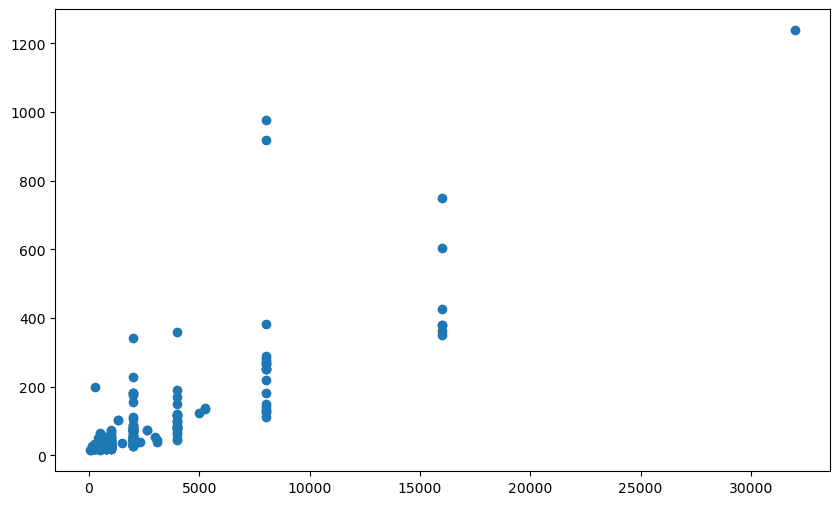

In [27]:
plt.figure(figsize = (10,6))
plt.scatter(x1, y)

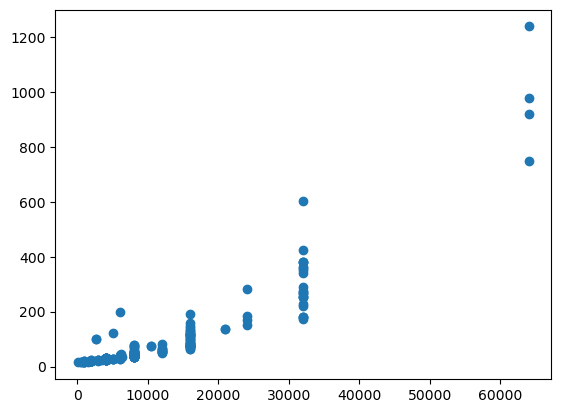

In [28]:
plt.scatter(x2, y)

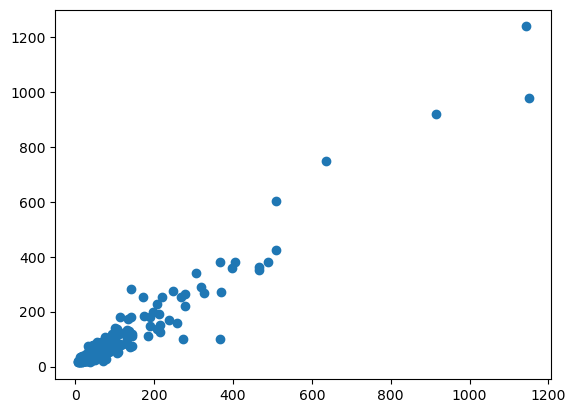

In [29]:
plt.scatter(x3, y)

На диаграммах рассеивания наиболее значимых признаков видно, что есть линейная зависимость, особоенно явно видная на 3 диаграмме 

Высокая кореляция (от +-0.75 до 1) у столбцов MMIN,MAX и PRP

In [8]:
#'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP'
x=df[['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP']]
y=df['ERP']

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

Линейная регрессия

In [10]:
# из набора линейных моделей библиотеки sklearn импортируем линейную регрессию
from sklearn.linear_model import LinearRegression
 
# создадим объект этого класса и запишем в переменную model
model = LinearRegression()
 
# обучим нашу модель
model.fit(x_train, y_train)

LinearRegression()

In [11]:
print(model.score(x_test, y_test))

0.8118109597742056


Ridge

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

RidgeRegression = Ridge()
hyperParameters = [{'alpha':[0.1, 1, 10, 100], 'solver':['auto']},
                 {'alpha':[0.1, 1, 10, 100], 'solver':['svd']}, 
                 {'alpha':[0.1, 1, 10, 100], 'solver':['cholesky']},
                 {'alpha':[0.1, 1, 10, 100], 'solver':['sparse_cg']},
                 {'alpha':[0.1, 1, 10, 100], 'solver':['lsqr']}]

ridgeRegressor = GridSearchCV(RidgeRegression, hyperParameters, scoring='neg_mean_squared_error', cv=5)
ridgeRegressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid=[{'alpha': [0.1, 1, 10, 100], 'solver': ['auto']},
                         {'alpha': [0.1, 1, 10, 100], 'solver': ['svd']},
                         {'alpha': [0.1, 1, 10, 100], 'solver': ['cholesky']},
                         {'alpha': [0.1, 1, 10, 100], 'solver': ['sparse_cg']},
                         {'alpha': [0.1, 1, 10, 100], 'solver': ['lsqr']}],
             scoring='neg_mean_squared_error')

In [13]:
print("Best value : ", ridgeRegressor.best_params_)

Best value :  {'alpha': 100, 'solver': 'sparse_cg'}


In [14]:
RidgeRegression = Ridge(alpha = 100, solver = 'sparse_cg')
RidgeRegression.fit(x_train, y_train)
print(RidgeRegression.score(x_test, y_test))

0.8117118855505804


Lasso

In [15]:
from sklearn.linear_model import Lasso
params = {'alpha': (np.logspace(-8, 8, 100))} 
lasso =  Lasso()
lasso_model = GridSearchCV(lasso, params, cv = 10)
lasso_model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-08, 1.45082878e-08, 2.10490414e-08, 3.05385551e-08,
       4.43062146e-08, 6.42807312e-08, 9.32603347e-08, 1.35304777e-07,
       1.96304065e-07, 2.84803587e-07, 4.13201240e-07, 5.99484250e-07,
       8.69749003e-07, 1.26185688e-06, 1.83073828e-06, 2.65608778e-06,
       3.85352859e-06, 5.59081018e-06, 8.11130831e-06, 1...
       1.91791026e+04, 2.78255940e+04, 4.03701726e+04, 5.85702082e+04,
       8.49753436e+04, 1.23284674e+05, 1.78864953e+05, 2.59502421e+05,
       3.76493581e+05, 5.46227722e+05, 7.92482898e+05, 1.14975700e+06,
       1.66810054e+06, 2.42012826e+06, 3.51119173e+06, 5.09413801e+06,
       7.39072203e+06, 1.07226722e+07, 1.55567614e+07, 2.25701972e+07,
       3.27454916e+07, 4.75081016e+07, 6.89261210e+07, 1.00000000e+08])})

In [16]:
print(lasso_model.best_params_)

{'alpha': 16.297508346206467}


In [17]:
lasso =  Lasso(alpha = 16.297508346206467)
lasso.fit(x_train, y_train)
print(lasso.score(x_test, y_test))

0.8153418494224247


In [18]:
y_pred1 = model.predict(x_test)
y_pred2 = RidgeRegression.predict(x_test)
y_pred3 = lasso.predict(x_test)

In [19]:
from sklearn import metrics
print('liner: RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))
print('Ridge RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))
print('Lasso RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))
print('Liner R2:', np.round(metrics.r2_score(y_test, y_pred1), 2))
print('Ridge R2:', np.round(metrics.r2_score(y_test, y_pred2), 2))
print('Lasso R2:', np.round(metrics.r2_score(y_test, y_pred3), 2))

liner: RMSE 35.28028525804561
Ridge RMSE: 35.289570886327525
Lasso RMSE: 34.94774555685608
Liner R2: 0.81
Ridge R2: 0.81
Lasso R2: 0.82


Все линейные модели показали довольно неплохой результат в отличие от других моделей